/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

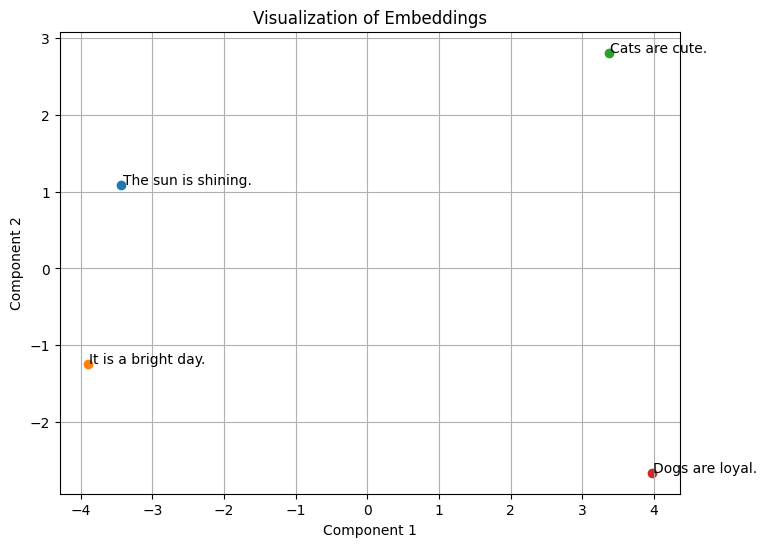

In [1]:
# In this exercise we are going to reduce the embeddings dimensions to visualize them in a graph:

from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

 # Phrases to analyze
phrases = [
    "The sun is shining.",
    "It is a bright day.",
    "Cats are cute.",
    "Dogs are loyal."
]

# Model and tokenizer
model =  AutoModel.from_pretrained("bert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Generate embeddings from the phrases
embeddings = []
for phrase in phrases:
  inputs = tokenizer(phrase, return_tensors="pt")
  output = model(**inputs).last_hidden_state
  embedding = output.mean(dim=1).detach().numpy() # average of tokens
  embeddings.append(embedding)

# Reduce dimensions with PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform([e[0] for e in embeddings])

 # Visualize the embeddings
plt.figure(figsize=(8, 6))
for i, phrase in enumerate(phrases):
  plt.scatter(embeddings_2d[i,0], embeddings_2d[i,1])
  plt.text(embeddings_2d[i,0] + 0.02, embeddings_2d[i,1], phrase, fontsize=10)

plt.title("Visualization of Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid()
plt.show()